# 00. PyTorch Fundamentals

Resource: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [21]:
import sys
print(sys.version)

3.12.1 | packaged by Anaconda, Inc. | (main, Jan 19 2024, 15:44:08) [MSC v.1916 64 bit (AMD64)]


In [22]:
import torch
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.0


## Working with tensors

### Tensors

**Creating tensors**

Tensors are pretty much multidimensional vectors

https://pytorch.org/docs/stable/tensors.html

### Naming conventions
(usually/example)
| Name | Dims | Convention |
|:----:|:----:|:----------:|
|scalar|   0  |     a      |
|vector|   1  |     y      |
|matrix|   2  |     Q      |
|tensor|  >2  |     X      |


In [23]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [24]:
# Scalar - single number, so no dimensions (like a point)
scalar.ndim

0

In [25]:
# Get tensor back as Python int
scalar.item()

7

In [26]:
# vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [27]:
# one dimension obviously, shape is [2]
print(vector.ndim, vector.shape)

1 torch.Size([2])


In [28]:
# matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [29]:
# two dimensions, shape is [2, 2]
print(MATRIX.ndim, MATRIX.shape)

2 torch.Size([2, 2])


In [30]:
# tensor
# I only entered the 3rd dimension and formatting this is already hell
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6]],
                       [[7, 8, 9],
                        [10, 11, 12]]])
TENSOR

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

In [31]:
TENSOR.shape

torch.Size([2, 2, 3])

In [32]:
# This won't work, the dimensions must be equal 
try:
    tensorTest = torch.tensor([[1,2], [3]])
except Exception as e:
    print(e)

expected sequence of length 2 at dim 1 (got 1)


### Random tensors

Neural networks start with randomly generated tensors and then adjust the numbers to better represent the data.

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [33]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])

In [34]:
# Create a random tensor with a similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, color channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

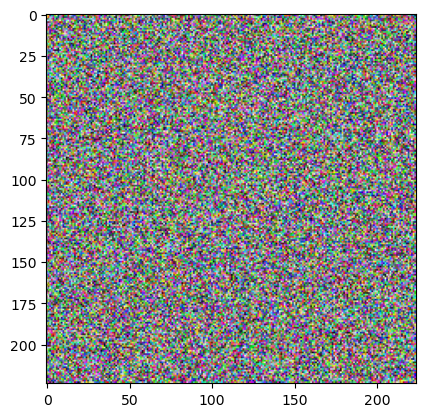

In [35]:
plt.imshow(random_image_size_tensor)

In [36]:
### Zeros and ones
zeros = torch.zeros(3, 3)
ones = torch.ones(3, 3)
zeros, ones

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

In [37]:
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

`torch.range(x, y)` - deprecated, creates numbers in range from x to y

`torch.arange(x, y)` - creates numbers in range from x to (y-1) - more python-like

https://pytorch.org/docs/stable/generated/torch.arange.html

In [38]:
# Use torch.arange()
range_tensor = torch.arange(start=0, end=21, step=2)

In [39]:
# Creating tensors like
# Takes the shape of the tensor you pass it and creates a zero tensor (or one tensor for ones_like())
ten_zeros = torch.zeros_like(input=range_tensor)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note: ** Tensor datatypes are one of the 3 most common problems you'll run into with PyTorch & deep learning:
1. Wrong datatype
2. Wrong shape
3. Tensors on wrong device

In [40]:
# float32 tensor aka the default one
float_32_tensor = torch.tensor([3., 6., 9.],
                               dtype=None, # data type obviously
                               device=None, # what device is the tensor on (CPU/GPU)
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor.dtype

torch.float32

In [41]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [42]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [43]:
int_32_tensor = torch.tensor([3, 6, 9],
                             dtype=torch.int32)

In [44]:
int_32_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [45]:
long_tensor = torch.tensor([3, 6, 9],
                            dtype=torch.long)

In [46]:
long_tensor * float_32_tensor # dtype = float32
# Apparently it can multiply whatever

tensor([ 9., 36., 81.])

### Getting information from tensors

1. Wrong datatype - get datatype from a tensor `tensor.dtype`
2. Wrong shape - get shape from a tensor `tensor.shape`
3. Wrong device - get device from a tensor `tensor.device`

In [47]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is stored on: {some_tensor.device}")

tensor([[0.5745, 0.9200, 0.3230, 0.8613],
        [0.0919, 0.3102, 0.9536, 0.6002],
        [0.0351, 0.6826, 0.3743, 0.5220]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is stored on: cpu


### Manipulating tensors (tensor operations)

Tensor operations include:
* addition
* subtraction
* multiplication (element-wise)
* division
* matrix multiplication

In [48]:
# Create a tensor
tensor = torch.tensor([1, 2, 3])

# addition
print(tensor + 10)

# multiply
print(tensor * 10)

# subtraction
print(tensor - 10)

# division
print(tensor / 10)

# element-wise multiplication
print(tensor * tensor)

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])
tensor([0.1000, 0.2000, 0.3000])
tensor([1, 4, 9])


In [49]:
# PyTorch in-built functions

# addition
print(torch.add(tensor, 10))

# multiply
print(torch.mul(tensor, 10))

# subtraction
print(torch.sub(tensor, 10))

# division
print(torch.div(tensor, 10))

# element-wise multiplication
print(torch.mul(tensor, tensor))

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])
tensor([0.1000, 0.2000, 0.3000])
tensor([1, 4, 9])


### Matrix multiplication

In [50]:
# Matrix multi
print(torch.matmul(tensor, tensor.T))

tensor(14)


C:\Users\Jakub\AppData\Local\Temp\ipykernel_21748\2810909063.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3641.)
  print(torch.matmul(tensor, tensor.T))


## Reproducibility
Every time you run a model, you want it to produce the same results.
Ergo using seed.

In [51]:
# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)
print(random_tensor_A)
print(random_tensor_B)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])


In [52]:
torch.manual_seed(RANDOM_SEED)
random_tensor_A = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A == random_tensor_B)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running PyTorch on the GPU

GPUs = faster computation, CUDA is epic

Where to get GPU:
* Google Colab
* Cloud computing
* ~~Steal one~~ Your own

In [20]:
!nvidia-smi

Fri Feb  2 01:49:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   59C    P0              18W /  88W |   1795MiB /  6144MiB |     35%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Check for GPU access with PyTorch

In [54]:
import torch
torch.cuda.is_available()

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.G. run on GPU if available, else run on CPU

In [64]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [65]:
# Count number of devices
torch.cuda.device_count()

1

#### Putting tensors and models on the GPU

In [66]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [67]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### Moving tensors back to the CPU

In [69]:
# If tensor is on GPU, can't transform it to NumPy
try:
    tensor_on_gpu.numpy()
except Exception as e:
    print(e)

can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


In [72]:
# We need to first set it to the CPU
tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

array([1, 2, 3], dtype=int64)

### Setting seed on the GPU

In [74]:
torch.cuda.manual_seed(42)